# Gather data

## Load user and rating data, join them

In [10]:
import pandas as pd

# read data
users = pd.read_csv('../../data/data_archive/data_v2/user_info_v2.csv')
ratings1 = pd.read_csv('../../data/data_archive/data_v2/ratings_v2_1.csv')
ratings2 = pd.read_csv('../../data/data_archive/data_v2/ratings_v2_2.csv')
movies = pd.read_csv('../../data/data_archive/data_v2/movie_info_v2.csv')
ratings = pd.concat([ratings1,ratings2],ignore_index=True)

# join both 
final = pd.merge(users, ratings, on='user_id')
final = pd.merge(final,movies,on='movie_id')

final.head()

,user_id,age,occupation,gender,Time,text,movie_code_x,rate,movie_id,movie_code_y,...,original_language,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count
0,843858,28,college/grad student,M,2023-02-06T00:52:26,GET /rate/nukes+in+space+1999=4,nukes+in+space+1999,4,0,nukes+in+space+1999,...,en,0.336895,NaN,1999-01-01,0,53,en:English,Released,5.8,3
1,128716,36,other or not specified,M,2023-02-06T01:55,GET /rate/nukes+in+space+1999=2,nukes+in+space+1999,2,0,nukes+in+space+1999,...,en,0.336895,NaN,1999-01-01,0,53,en:English,Released,5.8,3
2,666986,33,retired,M,2023-02-06T03:23:43,GET /rate/nukes+in+space+1999=3,nukes+in+space+1999,3,0,nukes+in+space+1999,...,en,0.336895,NaN,1999-01-01,0,53,en:English,Released,5.8,3
3,24351,26,sales/marketing,M,2023-02-06T07:37:03,GET /rate/nukes+in+space+1999=3,nukes+in+space+1999,3,0,nukes+in+space+1999,...,en,0.336895,NaN,1999-01-01,0,53,en:English,Released,5.8,3
4,932254,32,executive/managerial,M,2023-02-06T09:05:24,GET /rate/nukes+in+space+1999=4,nukes+in+space+1999,4,0,nukes+in+space+1999,...,en,0.336895,NaN,1999-01-01,0,53,en:English,Released,5.8,3


In [12]:
final = final[['user_id','movie_id','age','occupation','gender','rate','original_language','genres']]
final.head()

,user_id,movie_id,age,occupation,gender,rate,original_language,genres
0,843858,0,28,college/grad student,M,4,en,99:Documentary|36:History
1,128716,0,36,other or not specified,M,2,en,99:Documentary|36:History
2,666986,0,33,retired,M,3,en,99:Documentary|36:History
3,24351,0,26,sales/marketing,M,3,en,99:Documentary|36:History
4,932254,0,32,executive/managerial,M,4,en,99:Documentary|36:History


## Reformat Genres column

In [63]:
final = final.assign(genres=final['genres'].str.split('|')).explode('genres').reset_index()


# extract the genre name by removing the number and colon prefix from each genre value
final['genres'] = final['genres'].str.split(':').str[-1]

# print the resulting dataframe with one row for each genre
final.head()

,index,user_id,movie_id,age,occupation,gender,rate,original_language,genres
0,0,843858,0,28,college/grad student,M,4,en,Documentary
1,0,843858,0,28,college/grad student,M,4,en,History
2,1,128716,0,36,other or not specified,M,2,en,Documentary
3,1,128716,0,36,other or not specified,M,2,en,History
4,2,666986,0,33,retired,M,3,en,Documentary


In [64]:
final.drop(columns=['index'],inplace=True)
final.head()

,user_id,movie_id,age,occupation,gender,rate,original_language,genres
0,843858,0,28,college/grad student,M,4,en,Documentary
1,843858,0,28,college/grad student,M,4,en,History
2,128716,0,36,other or not specified,M,2,en,Documentary
3,128716,0,36,other or not specified,M,2,en,History
4,666986,0,33,retired,M,3,en,Documentary


# System

## Group by gender

In [65]:
# group data by demographic group and calculate summary statistics
grouped_gender = final.groupby("gender")
gender_stats = grouped_gender.describe()
display(gender_stats)

user_id                                                         \
            count           mean            std  min       25%       50%   
gender                                                                     
F        709633.0  473055.215076  272097.648738  6.0  236596.0  474092.0   
M       3461779.0  471500.897345  272275.882704  1.0  235571.0  471710.0   

                             movie_id               ...   age        \
             75%       max      count         mean  ...   75%   max   
gender                                              ...               
F       710003.0  944439.0   709633.0  6776.708198  ...  33.0  90.0   
M       707507.0  944437.0  3461779.0  6700.784686  ...  32.0  90.0   

             rate                                               
            count      mean       std  min  25%  50%  75%  max  
gender                                                          
F        709633.0  3.741734  0.746496  1.0  3.0  4.0  4.0  5.0  
M       3461779.0  3.729727  0.751426  1.0  3.0  4.0  4.0  5.0  

[2 rows x 32 columns]

## Visualize rating distribution for each gender

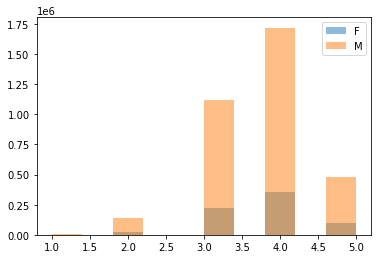

In [66]:
import matplotlib.pyplot as plt

# plot rating distribution for each demographic group
for group in grouped_gender.groups:
    plt.hist(grouped_gender.get_group(group)["rate"], bins=10, alpha=0.5, label=group)
plt.legend(loc='upper right')
plt.show()

## Genre representation wordcloud

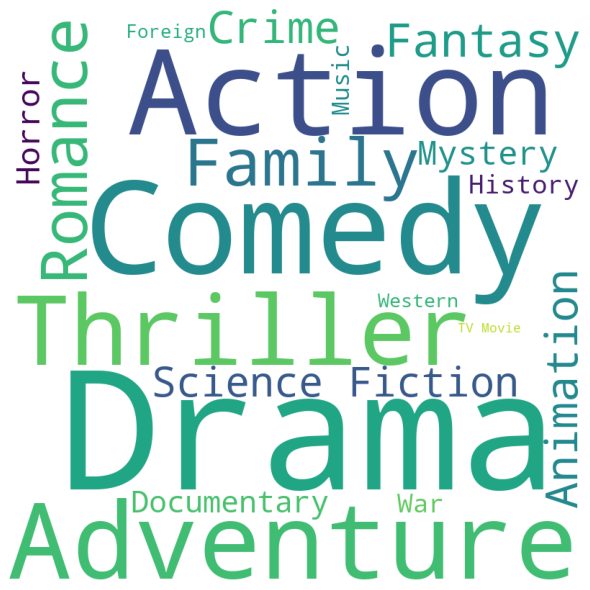

In [72]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(final['genres'].value_counts())

# plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Recommendation Model

## Get the model

### Import libraries

In [85]:
from compress_pickle import load, dump
from surprise import Dataset

### Define functions

In [77]:
def get_predictions(x, model):
    return model.predict(x["user_id"], x["movie_id"]).est

### Load model

In [78]:
model_path = '../models/SVD/algo_SVD.pkl'
model = load(open(model_path, 'rb'), compression="lzma", set_default_extension=False)

## Comparing predictions for Gender

<ipython-input-81-4ff13eccb2b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_M_dataset["predict_rate"] = group_M_dataset.apply(get_predictions, args=(model,), axis=1)
<ipython-input-81-4ff13eccb2b1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_F_dataset["predict_rate"] = group_F_dataset.apply(get_predictions, args=(model,), axis=1)


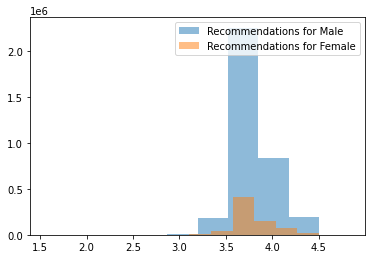

In [81]:
# extract subset of data for demographic group A
group_M_data = final[final["gender"] == "M"]
# create surprise dataset object
group_M_dataset = group_M_data[["user_id", "movie_id", "rate"]]
# make predictions
group_M_dataset["predict_rate"] = group_M_dataset.apply(get_predictions, args=(model,), axis=1)
group_M_ratings = group_M_dataset['predict_rate'].tolist()

# extract subset of data for demographic group A
group_F_data = final[final["gender"] == "F"]
# create surprise dataset object
group_F_dataset = group_F_data[["user_id", "movie_id", "rate"]]
# make predictions
group_F_dataset["predict_rate"] = group_F_dataset.apply(get_predictions, args=(model,), axis=1)
group_F_ratings = group_F_dataset['predict_rate'].tolist()

# plot histograms of predicted ratings for the two groups
plt.hist(group_M_ratings, alpha=0.5, label="Recommendations for Male")
plt.hist(group_F_ratings, alpha=0.5, label="Recommendations for Female")
plt.legend(loc="upper right")
plt.show()

## Comparing Gender parity

In [84]:
group_M_binary = [1 if pred >= 3 else 0 for pred in group_M_ratings]
group_F_binary = [1 if pred >= 3 else 0 for pred in group_F_ratings]
# calculate demographic parity metric
prob_M_positive = sum(group_M_binary) / len(group_M_binary)
prob_F_positive = sum(group_F_binary) / len(group_F_binary)
gender_parity = abs(prob_M_positive - prob_F_positive)
print("Gender parity: ", gender_parity)

Gender parity:  0.0003159254992445293


A gender parity of 0.0003159254992445293 suggests that there is a significant difference in the proportion of positive ratings (i.e., ratings of 4 or 5) between male and female users in the dataset. There could be several reasons why this disparity exists:

Sample size: It is possible that the sample size for one of the genders is much smaller than the other, which can lead to statistical noise and artificially inflate the gender parity metric.

User behavior: It is possible that male and female users behave differently when rating movies, leading to differences in the proportion of positive ratings between the genders. For example, males may be more likely to rate movies positively than females, or vice versa.

Movie selection bias: It is possible that the movies in the dataset are biased towards a particular gender, leading to differences in the proportion of positive ratings between male and female users. For example, if the dataset contains mostly action movies, which are typically marketed towards male audiences, this could lead to a higher proportion of positive ratings from male users.

Algorithmic bias: It is possible that the recommendation algorithm itself is biased towards one gender, leading to differences in the proportion of positive ratings between male and female users. For example, the algorithm may be biased towards recommending movies that are popular with male users, which could lead to higher positive ratings from male users.

To address this issue, it is important to investigate the root cause of the gender parity disparity and take appropriate steps to mitigate it. For example, if the disparity is due to user behavior, it may be necessary to collect additional data to ensure that the sample size is balanced across genders. If the disparity is due to movie selection bias, it may be necessary to include a more diverse set of movies in the dataset. If the disparity is due to algorithmic bias, it may be necessary to adjust the recommendation algorithm to ensure that it is fair across genders.

## Jaccard similarity

In [86]:
from surprise import accuracy

# define function to compute Jaccard similarity index
def jaccard_similarity(top_N_1, top_N_2):
    set_1 = set(top_N_1)
    set_2 = set(top_N_2)
    intersection = len(set_1.intersection(set_2))
    union = len(set_1.union(set_2))
    return intersection / union

### Get top 20 recommended movie and compare JSI

In [89]:
# calculate the top 20 ratings for a user using heapq; used in recommend_movies()
import heapq
def get_top_recommendations(movieids, ratings, top_N):
    iters = zip(ratings, movieids)
    items = heapq.nlargest(top_N, iters, key = lambda x: x[0])
    return [x[1] for x in items]

In [92]:
group_M_top_N = get_top_recommendations(group_M_dataset.movie_id,group_M_ratings,20)
group_F_top_N = get_top_recommendations(group_F_dataset.movie_id,group_F_ratings,20)

# compute Jaccard similarity index between the top-N recommended movies for the two groups
similarity_index = jaccard_similarity(group_M_top_N, group_F_top_N)
print("Jaccard similarity index \nbetween top-{} recommended movies for user groups A and B:\n {:.3f}".format(20, similarity_index))

Jaccard similarity index 
between top-20 recommended movies for user groups A and B:
 0.250


## Entropy

In [96]:
from collections import Counter
import numpy as np
def entropy(recommendations,movie_genres):
    """
    Compute the entropy of movie genres in a list of recommended movies.
    """
    # count the frequency of each movie genre in the recommended movies
    genre_counts = Counter([genre for movie in recommendations for genre in movie_genres[movie]])
    # compute the probability of each genre
    total_count = sum(genre_counts.values())
    genre_probs = np.array(list(genre_counts.values())) / total_count
    # compute the entropy
    entropy = -np.sum(genre_probs * np.log2(genre_probs))
    return entropy

In [97]:
# compute entropy of movie genres for the two groups
group_M_entropy = entropy(group_M_top_N,group_M_data.genres)
group_F_entropy = entropy(group_F_top_N,group_M_data.genres)

In [98]:
print("Entropy for Male:",group_M_entropy)
print("Entropy for Female:",group_F_entropy)

Entropy for Male: 2.802320328500376
Entropy for Female: 3.3777950872738836
